# Data Cleaning and Exploration
## Chess ELO Prediction & Anomaly Detection System

This notebook analyzes all datasets to determine appropriate variables for:
- **Phase 1**: ELO Prediction
- **Phase 2**: Cheating/Smurfing Detection

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

warnings.filterwarnings('ignore')
sns.set_style('whitegrid')
%matplotlib inline

## Phase 1 Datasets - ELO Prediction

### 1.1 Lichess Dataset

In [5]:
# Load Lichess dataset
lichess_df = pd.read_csv('elo_prediction/data/Chess Game Dataset (Lichess).csv')

print(f"Shape: {lichess_df.shape}")
print(f"\nColumns: {lichess_df.columns.tolist()}")
print(f"\nFirst few rows:")
lichess_df.head()

Shape: (20058, 16)

Columns: ['id', 'rated', 'created_at', 'last_move_at', 'turns', 'victory_status', 'winner', 'increment_code', 'white_id', 'white_rating', 'black_id', 'black_rating', 'moves', 'opening_eco', 'opening_name', 'opening_ply']

First few rows:


id  rated    created_at  last_move_at  turns victory_status winner  \
0  TZJHLljE  False  1.504210e+12  1.504210e+12     13      outoftime  white   
1  l1NXvwaE   True  1.504130e+12  1.504130e+12     16         resign  black   
2  mIICvQHh   True  1.504130e+12  1.504130e+12     61           mate  white   
3  kWKvrqYL   True  1.504110e+12  1.504110e+12     61           mate  white   
4  9tXo1AUZ   True  1.504030e+12  1.504030e+12     95           mate  white   

  increment_code       white_id  white_rating      black_id  black_rating  \
0           15+2       bourgris          1500          a-00          1191   
1           5+10           a-00          1322     skinnerua          1261   
2           5+10         ischia          1496          a-00          1500   
3           20+0  daniamurashov          1439  adivanov2009          1454   
4           30+3      nik221107          1523  adivanov2009          1469   

                                               moves opening_eco  \
0  d4 d5 c4 c6 cxd5 e6 dxe6 fxe6 Nf3 Bb4+ Nc3 Ba5...         D10   
1  d4 Nc6 e4 e5 f4 f6 dxe5 fxe5 fxe5 Nxe5 Qd4 Nc6...         B00   
2  e4 e5 d3 d6 Be3 c6 Be2 b5 Nd2 a5 a4 c5 axb5 Nc...         C20   
3  d4 d5 Nf3 Bf5 Nc3 Nf6 Bf4 Ng4 e3 Nc6 Be2 Qd7 O...         D02   
4  e4 e5 Nf3 d6 d4 Nc6 d5 Nb4 a3 Na6 Nc3 Be7 b4 N...         C41   

                             opening_name  opening_ply  
0        Slav Defense: Exchange Variation            5  
1  Nimzowitsch Defense: Kennedy Variation            4  
2   King's Pawn Game: Leonardis Variation            3  
3  Queen's Pawn Game: Zukertort Variation            3  
4                        Philidor Defense            5

In [6]:
# Data quality check
print("=== Lichess Dataset Quality ===")
print(f"\nMissing values:")
print(lichess_df.isnull().sum())
print(f"\nData types:")
print(lichess_df.dtypes)
print(f"\nBasic statistics:")
lichess_df.describe()

=== Lichess Dataset Quality ===

Missing values:
id                0
rated             0
created_at        0
last_move_at      0
turns             0
victory_status    0
winner            0
increment_code    0
white_id          0
white_rating      0
black_id          0
black_rating      0
moves             0
opening_eco       0
opening_name      0
opening_ply       0
dtype: int64

Data types:
id                 object
rated                bool
created_at        float64
last_move_at      float64
turns               int64
victory_status     object
winner             object
increment_code     object
white_id           object
white_rating        int64
black_id           object
black_rating        int64
moves              object
opening_eco        object
opening_name       object
opening_ply         int64
dtype: object

Basic statistics:


created_at  last_move_at         turns  white_rating  black_rating  \
count  2.005800e+04  2.005800e+04  20058.000000  20058.000000  20058.000000   
mean   1.483617e+12  1.483618e+12     60.465999   1596.631868   1588.831987   
std    2.850151e+10  2.850140e+10     33.570585    291.253376    291.036126   
min    1.376772e+12  1.376772e+12      1.000000    784.000000    789.000000   
25%    1.477548e+12  1.477548e+12     37.000000   1398.000000   1391.000000   
50%    1.496010e+12  1.496010e+12     55.000000   1567.000000   1562.000000   
75%    1.503170e+12  1.503170e+12     79.000000   1793.000000   1784.000000   
max    1.504493e+12  1.504494e+12    349.000000   2700.000000   2723.000000   

        opening_ply  
count  20058.000000  
mean       4.816981  
std        2.797152  
min        1.000000  
25%        3.000000  
50%        4.000000  
75%        6.000000  
max       28.000000

### 1.2 Chess.com Dataset

In [7]:
# Load Chess.com dataset
chesscom_df = pd.read_csv('elo_prediction/data/60,000+ Chess Game Dataset (Chess.com).csv')

print(f"Shape: {chesscom_df.shape}")
print(f"\nColumns: {chesscom_df.columns.tolist()}")
print(f"\nFirst few rows:")
chesscom_df.head()

Shape: (66879, 14)

Columns: ['white_username', 'black_username', 'white_id', 'black_id', 'white_rating', 'black_rating', 'white_result', 'black_result', 'time_class', 'time_control', 'rules', 'rated', 'fen', 'pgn']

First few rows:


white_username black_username                                    white_id  \
0         -Amos-    miniman2804     https://api.chess.com/pub/player/-amos-   
1         -Amos-      koltcho69     https://api.chess.com/pub/player/-amos-   
2         -Amos-      enhmandah     https://api.chess.com/pub/player/-amos-   
3      enhmandah         -Amos-  https://api.chess.com/pub/player/enhmandah   
4         -Amos-  Shalllow-Blue     https://api.chess.com/pub/player/-amos-   

                                         black_id  white_rating  black_rating  \
0    https://api.chess.com/pub/player/miniman2804          1708          1608   
1      https://api.chess.com/pub/player/koltcho69          1726          1577   
2      https://api.chess.com/pub/player/enhmandah          1727           842   
3         https://api.chess.com/pub/player/-amos-           819          1727   
4  https://api.chess.com/pub/player/shalllow-blue          1729          1116   

  white_result black_result time_class time_control  rules  rated  \
0          win   checkmated      daily     1/259200  chess   True   
1          win     resigned      daily     1/172800  chess   True   
2          win     resigned      daily     1/172800  chess   True   
3   checkmated          win      daily     1/172800  chess   True   
4          win     resigned      daily     1/172800  chess   True   

                                                 fen  \
0  r2r4/p2p1p1p/b6R/n1p1kp2/2P2P2/3BP3/PP5P/4K2R ...   
1       8/5Q1k/4n1pp/8/7P/2N2b2/PP3P2/5K2 b - - 1 33   
2  rn1q1b1r/kb2p1pp/2p5/p1Q5/N1BP2n1/4PN2/1P3PPP/...   
3  r3kb1r/pp3ppp/3p1n2/2pKp3/P3P3/1P6/4qP1P/QNB5 ...   
4  r3b2r/pp6/2pPpR1k/4n3/2P3Q1/3B4/PP4PP/R5K1 b -...   

                                                 pgn  
0  [Event "Enjoyable games 2 - Round 1"]\n[Site "...  
1  [Event "Rapid Rats - Board 5"]\n[Site "Chess.c...  
2  [Event "CHESS BOARD CLASH - Round 1"]\n[Site "...  
3  [Event "CHESS BOARD CLASH - Round 1"]\n[Site "...  
4  [Event "CHESS BOARD CLASH - Round 1"]\n[Site "...

In [8]:
# Data quality check
print("=== Chess.com Dataset Quality ===")
print(f"\nMissing values:")
print(chesscom_df.isnull().sum())
print(f"\nData types:")
print(chesscom_df.dtypes)
print(f"\nBasic statistics:")
chesscom_df.describe()

=== Chess.com Dataset Quality ===

Missing values:
white_username    0
black_username    0
white_id          0
black_id          0
white_rating      0
black_rating      0
white_result      0
black_result      0
time_class        0
time_control      0
rules             0
rated             0
fen               0
pgn               0
dtype: int64

Data types:
white_username    object
black_username    object
white_id          object
black_id          object
white_rating       int64
black_rating       int64
white_result      object
black_result      object
time_class        object
time_control      object
rules             object
rated               bool
fen               object
pgn               object
dtype: object

Basic statistics:


white_rating  black_rating
count  66879.000000  66879.000000
mean    1247.585729   1246.982730
std      403.895967    403.552072
min      100.000000    100.000000
25%      976.000000    975.000000
50%     1252.000000   1251.000000
75%     1524.000000   1524.000000
max     3172.000000   3172.000000

### 1.3 Rating Distribution Analysis

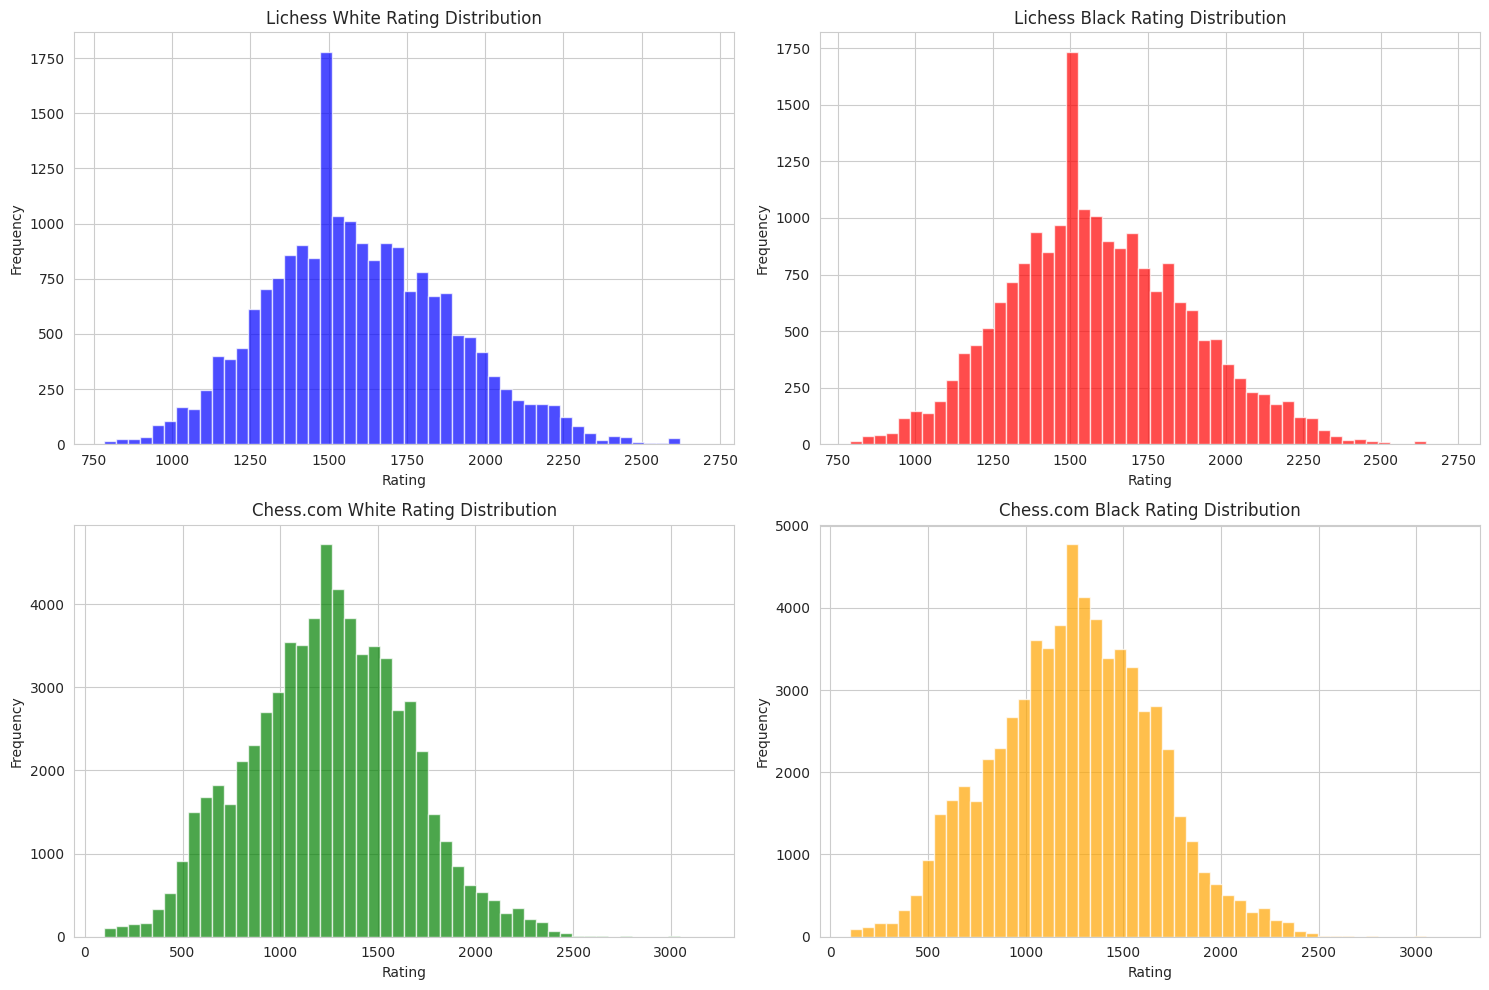

In [9]:
# Analyze rating distributions
fig, axes = plt.subplots(2, 2, figsize=(15, 10))

# Lichess ratings
if 'white_rating' in lichess_df.columns:
    axes[0, 0].hist(lichess_df['white_rating'].dropna(), bins=50, alpha=0.7, color='blue')
    axes[0, 0].set_title('Lichess White Rating Distribution')
    axes[0, 0].set_xlabel('Rating')
    axes[0, 0].set_ylabel('Frequency')
    
    axes[0, 1].hist(lichess_df['black_rating'].dropna(), bins=50, alpha=0.7, color='red')
    axes[0, 1].set_title('Lichess Black Rating Distribution')
    axes[0, 1].set_xlabel('Rating')
    axes[0, 1].set_ylabel('Frequency')

# Chess.com ratings
if 'white_rating' in chesscom_df.columns:
    axes[1, 0].hist(chesscom_df['white_rating'].dropna(), bins=50, alpha=0.7, color='green')
    axes[1, 0].set_title('Chess.com White Rating Distribution')
    axes[1, 0].set_xlabel('Rating')
    axes[1, 0].set_ylabel('Frequency')
    
    axes[1, 1].hist(chesscom_df['black_rating'].dropna(), bins=50, alpha=0.7, color='orange')
    axes[1, 1].set_title('Chess.com Black Rating Distribution')
    axes[1, 1].set_xlabel('Rating')
    axes[1, 1].set_ylabel('Frequency')

plt.tight_layout()
plt.show()

### 1.4 Feature Engineering Ideas for Phase 1

In [10]:
def extract_move_features(moves_str):
    """Extract features from move sequences"""
    if pd.isna(moves_str):
        return None
    
    moves = str(moves_str).split()
    features = {
        'total_moves': len(moves),
        'avg_move_length': np.mean([len(m) for m in moves]) if moves else 0,
        'captures': sum(1 for m in moves if 'x' in m),
        'checks': sum(1 for m in moves if '+' in m),
        'castles': sum(1 for m in moves if 'O-O' in m),
    }
    return features

# Test on a sample
if 'moves' in lichess_df.columns:
    sample_moves = lichess_df['moves'].iloc[0]
    print(f"Sample moves: {sample_moves[:100]}...")
    print(f"\nExtracted features: {extract_move_features(sample_moves)}")

Sample moves: d4 d5 c4 c6 cxd5 e6 dxe6 fxe6 Nf3 Bb4+ Nc3 Ba5 Bf4...

Extracted features: {'total_moves': 13, 'avg_move_length': np.float64(2.923076923076923), 'captures': 3, 'checks': 1, 'castles': 0}


In [11]:
# Proposed features for Phase 1 ELO prediction
phase1_features = {
    'Direct Features': [
        'opponent_rating',  # Key predictor
        'game_outcome',     # Win/Loss/Draw
        'color',            # White/Black
        'rated',            # Rated vs Casual
        'time_control',     # Blitz/Bullet/Rapid/Classical
    ],
    'Game Complexity Features': [
        'num_turns',        # Game length
        'opening_ply',      # Opening phase length
        'victory_status',   # How game ended (mate/resign/timeout)
    ],
    'Opening Features': [
        'opening_eco',      # ECO code (categorical)
        'opening_name',     # Opening name (categorical)
    ],
    'Move-Based Features (Advanced)': [
        'total_moves',      # From move sequence
        'capture_rate',     # Captures per move
        'check_rate',       # Checks per move
        'castle_indicator', # Did player castle
        'avg_move_complexity',  # Average characters per move
    ],
    'Stockfish Features (Phase 1b)': [
        'avg_centipawn_loss',   # Average evaluation loss
        'engine_match_rate',    # % moves matching top engine move
        'blunder_count',        # Moves with loss > 200 cp
        'accuracy_score',       # Overall move quality
    ]
}

for category, features in phase1_features.items():
    print(f"\n{category}:")
    for f in features:
        print(f"  - {f}")


Direct Features:
  - opponent_rating
  - game_outcome
  - color
  - rated
  - time_control

Game Complexity Features:
  - num_turns
  - opening_ply
  - victory_status

Opening Features:
  - opening_eco
  - opening_name

Move-Based Features (Advanced):
  - total_moves
  - capture_rate
  - check_rate
  - castle_indicator
  - avg_move_complexity

Stockfish Features (Phase 1b):
  - avg_centipawn_loss
  - engine_match_rate
  - blunder_count
  - accuracy_score


## Phase 2 Datasets - Cheating/Smurfing Detection

### 2.1 Spotting Cheaters Dataset

In [12]:
# Load cheating dataset
cheating_df = pd.read_csv('cheating_smurfing_detection/data/Spotting Cheaters : Chess cheating dataset.csv')

print(f"Shape: {cheating_df.shape}")
print(f"\nColumns: {cheating_df.columns.tolist()}")
print(f"\nFirst few rows:")
cheating_df.head()

Shape: (48933, 6)

Columns: ['Liste cheat white', 'Liste cheat black', 'Game', 'Elo White', 'Elo Black', 'Score']

First few rows:


Liste cheat white  \
0       00000000001111101010111010100110000001001111   
1  0000000000000010111101100000100111000111101111001   
2  0000000000111001110111100111111110101011110111...   
3            000000000011111101111111110110101111111   
4  0000000000001000111010111101001010011010011011...   

                                   Liste cheat black  \
0        0000000000111001000000001100100000000111000   
1  0000000000110111110111111111111111111011111111111   
2  0000000000111111100001111111111111111111010101...   
3             00000000000001101001000011100111100110   
4  0000000000000000010000001110011010100010001100...   

                                                Game  Elo White  Elo Black  \
0  1. d4 e6 2. c4 d5 3. Nc3 Be7 4. Nf3 Nf6 5. Bf4...       1001         -1   
1  1. d4 c5 2. c4 cxd4 3. Qxd4 Nc6 4. Qd1 e6 5. N...       1001         -1   
2  1. e4 e5 2. d4 exd4 3. Qxd4 Nc6 4. Qd3 b6 5. B...       1001         -1   
3  1. e4 e5 2. Nf3 Nf6 3. Nc3 Bc5 4. Bc4 d6 5. O-...       1002         -1   
4  1. d4 d5 2. c4 Nf6 3. Nc3 e6 4. Bg5 Be7 5. e3 ...       1002         -1   

     Score  
0  1/2-1/2  
1  1/2-1/2  
2  1/2-1/2  
3  1/2-1/2  
4  1/2-1/2

In [13]:
# Data quality check
print("=== Cheating Dataset Quality ===")
print(f"\nMissing values:")
print(cheating_df.isnull().sum())
print(f"\nData types:")
print(cheating_df.dtypes)

# Check for label distribution
if 'cheater' in cheating_df.columns or 'is_cheater' in cheating_df.columns:
    label_col = 'cheater' if 'cheater' in cheating_df.columns else 'is_cheater'
    print(f"\nClass distribution:")
    print(cheating_df[label_col].value_counts())
    print(f"\nClass balance:")
    print(cheating_df[label_col].value_counts(normalize=True))

=== Cheating Dataset Quality ===

Missing values:
Liste cheat white    0
Liste cheat black    0
Game                 1
Elo White            0
Elo Black            0
Score                0
dtype: int64

Data types:
Liste cheat white    object
Liste cheat black    object
Game                 object
Elo White             int64
Elo Black             int64
Score                object
dtype: object


### 2.2 Cheating Tuesdays Dataset

In [14]:
# Load Cheating Tuesdays datasets
ct_games = pd.read_csv('cheating_smurfing_detection/data/Cheating Tuesdays: Chess.com TT & Stockfish 16/analysed_games.csv')
ct_moves = pd.read_csv('cheating_smurfing_detection/data/Cheating Tuesdays: Chess.com TT & Stockfish 16/moves.csv')
ct_players = pd.read_csv('cheating_smurfing_detection/data/Cheating Tuesdays: Chess.com TT & Stockfish 16/players.csv')

print("=== Cheating Tuesdays: Analyzed Games ===")
print(f"Shape: {ct_games.shape}")
print(f"Columns: {ct_games.columns.tolist()}")
ct_games.head()

=== Cheating Tuesdays: Analyzed Games ===
Shape: (161203, 24)
Columns: ['tournament_type', 'tournament_date', 'tournament_id', 'game_id', 'tournament_date_iso', 'moves', 'username_white', 'username_black', 'chessTitle_white', 'chessTitle_black', 'countryName_white', 'countryName_black', 'isBlocked_white', 'isBlocked_black', 'isEnabled_white', 'isEnabled_black', 'White', 'Black', 'Result', 'ECO', 'WhiteElo', 'BlackElo', 'Termination', 'is_analysed']


tournament_type   tournament_date  tournament_id      game_id  \
0  early-titled-tuesday-blitz  december-12-2023        4427730  96136453865   
1  early-titled-tuesday-blitz      june-13-2023        4073113  80409237427   
2  early-titled-tuesday-blitz       may-16-2023        4020317  77988214797   
3  early-titled-tuesday-blitz     april-04-2023        3947951  74360656481   
4  early-titled-tuesday-blitz  december-19-2023        4450894  96744149239   

  tournament_date_iso  moves username_white        username_black  \
0          2023-12-12    113     leschebaza                 brm72   
1          2023-06-13    107    Camilla_Lee        TrahtarBelarus   
2          2023-05-16     52  Elbek_Jumanov                 Witik   
3          2023-04-04     78      broskolis  AlexPapasimakopoulos   
4          2023-12-19    111        tantaan       UnTucopalaTimba   

  chessTitle_white chessTitle_black  ... isEnabled_white isEnabled_black  \
0               FM               NM  ...            True            True   
1               NM               FM  ...            True            True   
2               FM               FM  ...            True            True   
3               FM               FM  ...           False            True   
4              WFM              WCM  ...            True            True   

           White                 Black   Result  ECO WhiteElo BlackElo  \
0     leschebaza                 brm72  1/2-1/2  A35     2344     2512   
1    Camilla_Lee        TrahtarBelarus      1-0  B56     2580     2795   
2  Elbek_Jumanov                 Witik      0-1  D30     2451     2780   
3      broskolis  AlexPapasimakopoulos      0-1  C02     2438     2731   
4        tantaan       UnTucopalaTimba  1/2-1/2  E27     2458     2103   

                               Termination is_analysed  
0      Game drawn by insufficient material        True  
1                  Camilla_Lee won on time        True  
2                        Witik won on time        True  
3  AlexPapasimakopoulos won by resignation        True  
4                 Game drawn by repetition        True  

[5 rows x 24 columns]

In [15]:
print("=== Cheating Tuesdays: Moves ===")
print(f"Shape: {ct_moves.shape}")
print(f"Columns: {ct_moves.columns.tolist()}")
ct_moves.head()

=== Cheating Tuesdays: Moves ===
Shape: (14114903, 35)
Columns: ['Best Move', 'Best Move Eval', 'Real Move', 'Ranking Real Move', 'Real Move Eval', 'plycount', 'player', 'difference', 'move_timestamp', 'move_time', 'winning_chances', 'winning_chances_before', 'move_accuracy', 'winning_chances_delta', 'judgement', 'game_id', 'username', 'move', 'game_result', 'did_flag', 'was_flagged', 'ELO', 'is_error', 'is_blunder', 'skip', 'use', 'is_top1', 'is_top3', 'is_top5', 'move_timestamp_bin', 'is_endgame', 'game_length', 'pv_rank_top3', 'pv_rank_top2', 'pv_rank_top1']


Best Move  Best Move Eval Real Move  Ranking Real Move  Real Move Eval  \
0      e2e4            0.38      e2e4                  1            0.38   
1      e7e5            0.23      e7e5                  1            0.23   
2      g1f3            0.23      g1f3                  1            0.23   
3      b8c6            0.28      b8c6                  1            0.28   
4      f1b5            0.28      f1c4                  3            0.17   

   plycount player  difference  move_timestamp  move_time  ...    use  \
0         1  white       -0.00           177.3        3.7  ...  False   
1         2  black        0.00           176.7        4.3  ...   True   
2         3  white       -0.00           177.3        1.0  ...  False   
3         4  black        0.00           176.7        1.0  ...   True   
4         5  white        0.11           172.7        5.6  ...  False   

   is_top1  is_top3  is_top5 move_timestamp_bin  is_endgame game_length  \
0     True     True     True                0.1       False          37   
1     True     True     True                0.1       False          37   
2     True     True     True                0.1       False          37   
3     True     True     True                0.1       False          37   
4    False     True     True                0.2       False          37   

   pv_rank_top3  pv_rank_top2  pv_rank_top1  
0             1             1             1  
1             1             1             1  
2             2             2             2  
3             2             2             2  
4             3             0             0  

[5 rows x 35 columns]

In [16]:
print("=== Cheating Tuesdays: Players ===")
print(f"Shape: {ct_players.shape}")
print(f"Columns: {ct_players.columns.tolist()}")
ct_players.head()

=== Cheating Tuesdays: Players ===
Shape: (4421, 4)
Columns: ['username', 'chessTitle', 'countryName', 'averageElo']


username chessTitle    countryName  averageElo
0     MagnusCarlsen         GM         Norway        3253
1            Hikaru         GM  United States        3218
2        nihalsarin         GM       Tanzania        3132
3  DanielNaroditsky         GM  United States        3129
4         LyonBeast         GM         France        3112

### 2.3 Feature Engineering Ideas for Phase 2

In [17]:
# Proposed features for Phase 2 Anomaly Detection
phase2_features = {
    'Performance Anomalies': [
        'elo_residual',              # From Phase 1: predicted - actual ELO
        'performance_volatility',    # Std dev of game results
        'win_rate_vs_expected',      # Win rate above statistical expectation
        'rating_gain_velocity',      # Rapid rating increases
    ],
    'Behavioral Patterns': [
        'avg_move_time',             # Time per move
        'move_time_variance',        # Consistency of move timing
        'time_pressure_performance', # Performance in time trouble
        'game_abandonment_rate',     # Frequency of resignations/disconnects
    ],
    'Stockfish Alignment Features': [
        'engine_match_rate',         # % top engine moves
        'top3_engine_match_rate',    # % moves in top 3 engine choices
        'avg_centipawn_loss',        # Average evaluation loss (CPL)
        'cpl_consistency',           # Low variance = suspicious
        'blunder_rate',              # Too few blunders = suspicious
        'accuracy_score',            # Overall accuracy (may be too high)
        'position_complexity_correlation', # Performance vs position difficulty
    ],
    'Account Patterns (Smurfing)': [
        'account_age',               # New accounts
        'games_played',              # Low game count with high skill
        'rating_consistency',        # Stable at lower rating then sudden jump
        'opponent_rating_pattern',   # Consistently playing lower-rated players
    ],
    'Statistical Features': [
        'autoencoder_reconstruction_error', # Anomaly score from Phase 2a
        'isolation_forest_score',    # Alternative anomaly detection
        'z_score_performance',       # Standard deviations from mean
    ]
}

for category, features in phase2_features.items():
    print(f"\n{category}:")
    for f in features:
        print(f"  - {f}")


Performance Anomalies:
  - elo_residual
  - performance_volatility
  - win_rate_vs_expected
  - rating_gain_velocity

Behavioral Patterns:
  - avg_move_time
  - move_time_variance
  - time_pressure_performance
  - game_abandonment_rate

Stockfish Alignment Features:
  - engine_match_rate
  - top3_engine_match_rate
  - avg_centipawn_loss
  - cpl_consistency
  - blunder_rate
  - accuracy_score
  - position_complexity_correlation

Account Patterns (Smurfing):
  - account_age
  - games_played
  - rating_consistency
  - opponent_rating_pattern

Statistical Features:
  - autoencoder_reconstruction_error
  - isolation_forest_score
  - z_score_performance


## Data Cleaning Summary

### Phase 1 - ELO Prediction Data Preparation

In [18]:
def clean_phase1_data(df, dataset_name):
    """Clean and prepare data for Phase 1 ELO prediction"""
    df_clean = df.copy()
    
    print(f"\n=== Cleaning {dataset_name} ===")
    print(f"Initial shape: {df_clean.shape}")
    
    # Remove games with missing ratings
    rating_cols = ['white_rating', 'black_rating']
    initial_rows = len(df_clean)
    df_clean = df_clean.dropna(subset=[col for col in rating_cols if col in df_clean.columns])
    print(f"Removed {initial_rows - len(df_clean)} rows with missing ratings")
    
    # Remove extreme outliers (ratings < 500 or > 3000)
    for col in rating_cols:
        if col in df_clean.columns:
            initial_rows = len(df_clean)
            df_clean = df_clean[(df_clean[col] >= 500) & (df_clean[col] <= 3000)]
            print(f"Removed {initial_rows - len(df_clean)} rows with outlier {col}")
    
    # Remove unrated games if needed for consistency
    if 'rated' in df_clean.columns:
        initial_rows = len(df_clean)
        # Keep only rated games for more reliable ELO estimation
        df_clean = df_clean[df_clean['rated'] == True]
        print(f"Removed {initial_rows - len(df_clean)} unrated games")
    
    print(f"Final shape: {df_clean.shape}")
    print(f"Retention rate: {len(df_clean)/len(df)*100:.2f}%")
    
    return df_clean

# Apply cleaning
if 'lichess_df' in locals():
    lichess_clean = clean_phase1_data(lichess_df, "Lichess")
    
if 'chesscom_df' in locals():
    chesscom_clean = clean_phase1_data(chesscom_df, "Chess.com")


=== Cleaning Lichess ===
Initial shape: (20058, 16)
Removed 0 rows with missing ratings
Removed 0 rows with outlier white_rating
Removed 0 rows with outlier black_rating
Removed 3903 unrated games
Final shape: (16155, 16)
Retention rate: 80.54%

=== Cleaning Chess.com ===
Initial shape: (66879, 14)
Removed 0 rows with missing ratings
Removed 1791 rows with outlier white_rating
Removed 754 rows with outlier black_rating
Removed 1685 unrated games
Final shape: (62649, 14)
Retention rate: 93.68%

=== Cleaning Chess.com ===
Initial shape: (66879, 14)
Removed 0 rows with missing ratings
Removed 1791 rows with outlier white_rating
Removed 754 rows with outlier black_rating
Removed 1685 unrated games
Final shape: (62649, 14)
Retention rate: 93.68%


### Phase 2 - Anomaly Detection Data Preparation

In [19]:
def clean_phase2_data(df, dataset_name):
    """Clean and prepare data for Phase 2 anomaly detection"""
    df_clean = df.copy()
    
    print(f"\n=== Cleaning {dataset_name} for Anomaly Detection ===")
    print(f"Initial shape: {df_clean.shape}")
    
    # Remove rows with critical missing values
    initial_rows = len(df_clean)
    df_clean = df_clean.dropna(thresh=len(df_clean.columns) * 0.7)  # Keep rows with at least 70% data
    print(f"Removed {initial_rows - len(df_clean)} rows with excessive missing data")
    
    print(f"Final shape: {df_clean.shape}")
    
    return df_clean

# Apply cleaning
if 'cheating_df' in locals():
    cheating_clean = clean_phase2_data(cheating_df, "Spotting Cheaters")


=== Cleaning Spotting Cheaters for Anomaly Detection ===
Initial shape: (48933, 6)
Removed 0 rows with excessive missing data
Final shape: (48933, 6)
